In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Find the probability that sum of two die rolls is greater than equal to 10
seed=1000
np.random.seed(seed)
sim=100000

A=np.random.randint(1,7,sim)
B=np.random.randint(1,7,sim)

sum_dies=A+B
prob= (sum_dies>=10).mean()
print(prob)
#plt.hist(sum_dies)
#plt.show()

0.16681


In [4]:
# Find the probability that is sides ~U(0,1) then it forms a triangle
a=np.random.uniform(0,1,sim)
b=np.random.uniform(0,1,sim)
c=np.random.uniform(0,1,sim)

prob= ((a+b>=c)&(b+c>=a)&(a+c>=b)).mean()

print(prob)

0.50188


In [8]:
i=10
target=20
ruin=0
win_p=0.55
step=0
game=[]
for j in range(5):
    while ruin<i<target:
        if np.random.rand()<win_p:
            step+=1
            i+=1
        else:
            step+=1
            i-=1
    if i==ruin:
       game.append(['ruin',np.mean(step)])
    elif i==target:
        game.append(['target',np.mean(step)])
    i=10
    step=0
print(game)

[['target', 34.0], ['target', 60.0], ['target', 250.0], ['target', 54.0], ['target', 120.0]]


In [25]:
#Gambler ruin problem

import random
random.seed(89)
def gambler_ruin(p,target,capital):
    steps=0
    while 0<capital<target:
        if random.random()<p:
            capital+=1
            steps+=1
        else:
            capital-=1
            steps+=1
    ruined = (capital==0)
    return ruined , steps

sim = 100000
ruin_count=0
steps_count=0
for i in range(sim):
    ruined , steps = gambler_ruin(p=0.55,target=20, capital=10)
    steps_count+=steps
    ruin_count+=int(ruined)

ruin_chance = ruin_count/sim
average_steps = steps_count/sim
chance_win=1-ruin_chance
print(f"Probability of hitting target: {chance_win: .4f}")
print(f"Average number of steps per game: {average_steps: .4f}")

Probability of hitting target:  0.8819
Average number of steps per game:  75.9036


Average games played: 998.32
Prob of win:  0.02%
Prob of loss:  1.28%
Prob of breakeven: 1.90%
Prob of timeout: 96.80%


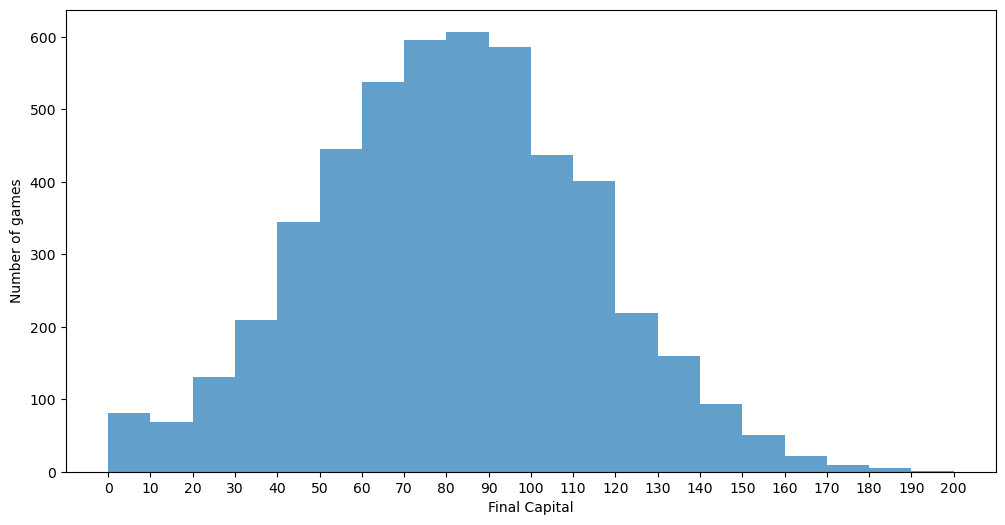

In [35]:
"""
Monte Carlo Exercise: “Breaking Even at the Casino”

You start with ₹100 and play a sequence of games.
Each game:

You win ₹1 with probability p = 0.49,
You lose ₹1 with probability 1 – p = 0.51.

You stop playing either when:
You double your money (₹200), or
You go broke (₹0), or
You’ve played a maximum of 1000 games, whichever comes first.

Simulate one gambler’s run step-by-step.
Track the capital after each game.
Stop at the first of the three stopping conditions.

Run 50 000 simulations and estimate:

Probability of breaking even (ending exactly back at ₹100 after 1000 games, without hitting ruin or doubling).

Probability of doubling your money.

Average number of games played (until stopping).

Optionally: plot a histogram of final capital across all runs."""

import matplotlib.pyplot as plt
import random

random.seed(100)


def play_game(p,capital,target):
    games=0
    start_capital=capital
    while (0<capital<target) and games<1000:
        if random.random()<p:
            capital+=1
            games+=1
        else:
            capital-=1
            games+=1
    won = (capital==target)
    breakeven = (capital==start_capital and games==1000)
    loss = (capital==0)
    timeout = (games==1000 and capital !=start_capital)
    return games, won, loss, breakeven, timeout, capital

sim=5000

total_games=0
total_wins=0
total_losses=0
total_breakeven=total_timeout=0
capital_data=[]

for i in range(sim):
    games, won, loss, breakeven, timeout, c = play_game(.49,100,200)
    total_games+=games
    total_wins+=int(won)
    total_losses+=int(loss)
    total_breakeven+=int(breakeven)
    total_timeout+=int(timeout)
    capital_data.append(c)
    
average_games=total_games/sim
prob_win=total_wins/sim
prob_loss=total_losses/sim
prob_breakeven=total_breakeven/sim
prob_timeout=total_timeout/sim

print(f"Average games played: {average_games :.2f}")
print(f"Prob of win: {prob_win : .2%}")
print(f"Prob of loss: {prob_loss : .2%}")
print(f"Prob of breakeven: {prob_breakeven :.2%}")
print(f"Prob of timeout: {prob_timeout :.2%}")

plt.figure(figsize=(12,6))
bins=np.arange(0,210,10)
plt.hist(capital_data, bins=bins, alpha=0.7)
plt.xlabel("Final Capital")
plt.ylabel("Number of games")
plt.xticks(bins)
plt.axvline(x=100, linewidth=)
plt.show()